# MNIST
[THE MNIST DATABASE of handwritten digits](http://yann.lecun.com/exdb/mnist/)

Train classifiers using sklearn to recognize digit images

---

# Table of Content
- [Setup](#setup)
- [Load Data](#load-data)
- [Training](#training)
    - [Naive Bayes](#naive-bayes)
    - [SVM](#svm)
    - [KNN](#knn)

---

<a name='setup'></a>
# Setup

In [1]:
%matplotlib inline

In [2]:
import math
import random

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

---

<a name='load-data'></a>
# Load Data

In [3]:
from sklearn.datasets import load_digits

In [4]:
dataset = load_digits()

In [5]:
dataset

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0

In [6]:
images = dataset.images
labels = dataset.target

In [7]:
print('images.shape: ', images.shape)
print('labels.shape: ', labels.shape)
print('First image:\n', images[0])
print('First label:', labels[0])

images.shape:  (1797, 8, 8)
labels.shape:  (1797,)
First image:
 [[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
First label: 0


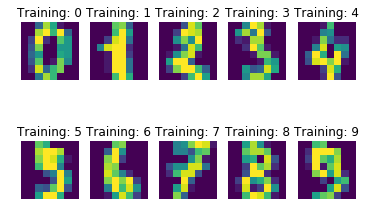

In [8]:
images_and_labels = list(zip(images, labels))
display_num = 10
for index, (image, label) in enumerate(images_and_labels[:display_num]):
    plt.subplot(2, math.floor(display_num/2), index + 1)
    plt.axis('off')
    plt.imshow(image, interpolation='nearest')
    plt.title('Training: %i' % label)

### Split training data and testing data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
flat_images = images.reshape((1797, 64))

In [11]:
X_train, X_test, y_train, y_test = train_test_split(flat_images, labels, random_state=42)

In [12]:
print('X_train[0]: ', X_train[0])
print('y_train[0]: ', y_train[0])

X_train[0]:  [ 0.  0.  2. 15. 15. 16. 11.  0.  0.  0.  8. 16. 11.  3.  0.  0.  0.  0.
 13.  9.  0.  0.  0.  0.  0.  5. 16.  3.  9. 11.  3.  0.  0. 10. 15. 15.
 16. 16. 11.  0.  0.  6. 16. 10.  7. 16.  5.  0.  0.  0.  3.  4. 15.  8.
  0.  0.  0.  0.  4. 15.  7.  0.  0.  0.]
y_train[0]:  5


---

<a name='training'></a>
# Training

<a name='naive-bayes'></a>
## Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
%%time

clf = GaussianNB()
clf.fit(X_train, y_train)

CPU times: user 2.98 ms, sys: 1.26 ms, total: 4.24 ms
Wall time: 3.75 ms


In [15]:
sampled_image_label = random.sample(list(zip(flat_images, labels)), 1)[0]

print('Image:\n', sampled_image_label[0].reshape(8, 8))
print('Label: ', sampled_image_label[1])

Image:
 [[ 0.  1. 14. 16. 16. 14.  1.  0.]
 [ 0.  0. 10. 13.  6.  4.  0.  0.]
 [ 0.  3. 15. 11.  3.  0.  0.  0.]
 [ 0.  5. 16. 16. 16.  6.  0.  0.]
 [ 0.  0.  0.  1. 10. 15.  0.  0.]
 [ 0.  0.  0.  0. 11. 11.  0.  0.]
 [ 0.  0.  7. 12. 16.  5.  0.  0.]
 [ 0.  2. 15. 15.  5.  0.  0.  0.]]
Label:  5


In [16]:
predict_value = clf.predict(sampled_image_label[0].reshape(1, -1))

print('Predict Value: ', predict_value[0])
print('Expected Value: ', sampled_image_label[1])

Predict Value:  5
Expected Value:  5


In [17]:
pred = clf.predict(X_test)
accuracy_score(pred, y_test)

0.8555555555555555

#### Reference
[1.9. Naive Bayes](http://scikit-learn.org/stable/modules/naive_bayes.html)

<a name='svm'></a>
## SVM

In [18]:
from sklearn import svm

In [19]:
%%time

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

CPU times: user 33.3 ms, sys: 1.82 ms, total: 35.1 ms
Wall time: 36.5 ms


In [20]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9822222222222222

### Deploy an RBF Kernel

In [21]:
%%time

clf = svm.SVC(kernel='rbf', C=1000, gamma='scale')
clf.fit(X_train, y_train)

CPU times: user 62.8 ms, sys: 1.8 ms, total: 64.6 ms
Wall time: 63.2 ms


In [22]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9888888888888889

### Find the best parameter

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
svc = svm.SVC()
parameters = {
    'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
    'C': (1, 10, 100),
    'gamma': ('scale',)
}

In [25]:
%%time

clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(X_train, y_train)

CPU times: user 4.56 s, sys: 19.5 ms, total: 4.58 s
Wall time: 4.6 s


In [26]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [27]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9888888888888889

#### Reference
- [1.4. Support Vector Machine](http://scikit-learn.org/stable/modules/svm.html)
- [sklearn.model_selection.GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

<a name='knn'></a>
## KNN

In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [29]:
%%time

clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

CPU times: user 2.34 ms, sys: 1.44 ms, total: 3.78 ms
Wall time: 4.37 ms


In [30]:
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.9933333333333333

#### Reference
[1.6. Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html)